In [48]:
import pandas as pd
import numpy as np

In [49]:
sym_wgh_df = pd.read_csv('../Symptom-severity.csv')
symptoms_df = pd.read_csv('../symptoms-weight.csv',index_col="Unnamed: 0")

In [50]:
sym_wgh_df.sort_values('Symptom',inplace=True)


In [51]:
sym_wgh_df['Symptom'].drop_duplicates(inplace=True)
sym_wgh_df.set_index('Symptom',inplace=True)
sym_wgh_df.head()

,weight
Symptom,
abdominal_pain,4
abnormal_menstruation,6
acidity,3
acute_liver_failure,6
altered_sensorium,2


In [52]:
symptoms = sym_wgh_df.index.unique()

In [53]:
symptoms_df.head()

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,Disease
1186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
2865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
1187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
1188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo


In [54]:
labels=symptoms_df['Disease'].values
data = symptoms_df.iloc[:,:-1]


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,precision_score
import seaborn as sns

In [56]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size=0.85)

In [57]:
x_train

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
142,4,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,3,0,0,0,3
2261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,3
3022,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
1492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,3
650,4,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,3
728,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
4705,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0


In [58]:
model = SVC(probability=True)


In [59]:
model.fit(x_train, y_train)

preds = model.predict(x_test)

In [60]:
f1 = f1_score(y_test, preds, average='macro') * 100
acu = accuracy_score(y_test, preds)*100
pre=precision_score(y_test,preds,average="weighted")
print('F1-score% = ',f1)
print('Accuracy% = ',acu )
print('Precision = ',pre)


F1-score% =  100.0
Accuracy% =  100.0
Precision =  1.0


<AxesSubplot:>

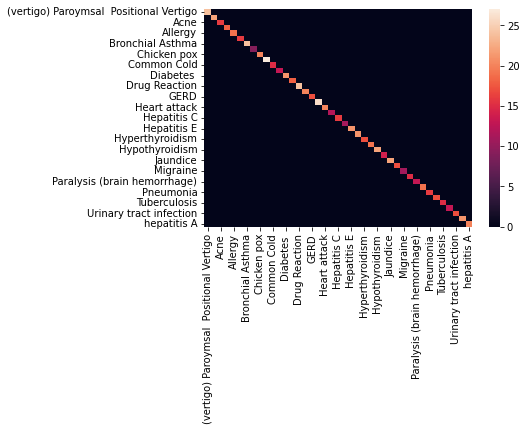

In [61]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(
    conf_mat, index=symptoms_df['Disease'].unique(), columns=symptoms_df['Disease'].unique())
sns.heatmap(df_cm)


In [62]:
import pickle

with open('../model.pkl','wb') as file:
	pickle.dump(model,file)